<a href="https://colab.research.google.com/github/Niraj7667/ML-models/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install tensorflow

In [40]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [42]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
## divide the dataset into independent and dependent feature

In [44]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [45]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [46]:
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [47]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [50]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [51]:
X_train.shape

(8000, 11)

In [52]:
# Part 2 - Now let's make the ANN!

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [54]:
# Initialising the ANN
classifier = Sequential()

In [55]:
# Adding the input layer
classifier.add(Dense(units=11,activation='relu'))


In [56]:
# Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [57]:
# Adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

In [58]:
# Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [59]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [60]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.1)

In [61]:
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [62]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50,callbacks=early_stopping)

Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7461 - loss: 0.6265 - val_accuracy: 0.7955 - val_loss: 0.4783
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8024 - loss: 0.4870 - val_accuracy: 0.7955 - val_loss: 0.4519
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7895 - loss: 0.4799 - val_accuracy: 0.7955 - val_loss: 0.4348
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7934 - loss: 0.4699 - val_accuracy: 0.7955 - val_loss: 0.4310
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7824 - loss: 0.4517 - val_accuracy: 0.7955 - val_loss: 0.4235
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7964 - loss: 0.4338 - val_accuracy: 0.7955 - val_loss: 0.4186
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7875 - loss: 0.4416 - val_accuracy: 0.7955 - val_loss: 0.4139
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7989 - loss: 0.4301 - val_accuracy: 0.

In [63]:
# list all data in history

print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


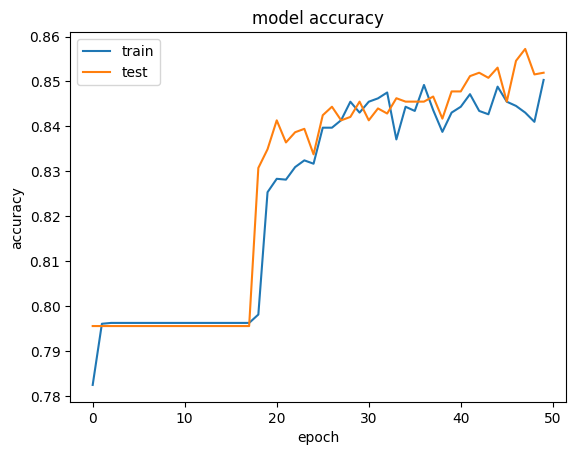

In [64]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

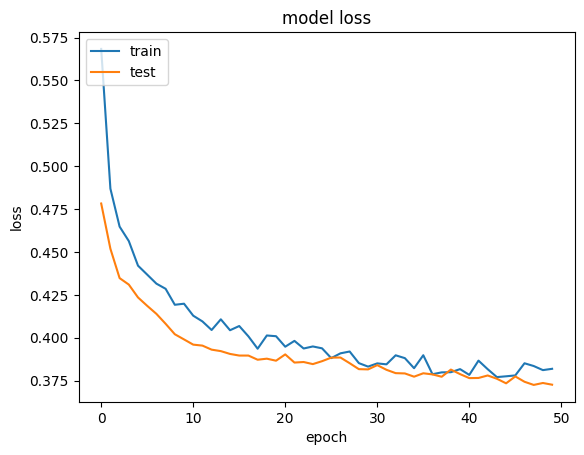

In [65]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [66]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [67]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1559,   36],
       [ 249,  156]])

In [68]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [69]:
score

0.8575

In [70]:
#get teh weights
classifier.get_weights()

[array([[ 3.38776886e-01, -8.56252611e-02, -8.24323576e-03,
         -8.80174339e-02, -3.83761227e-01,  3.14052284e-01,
          2.30198186e-02, -2.05292001e-01,  1.96040004e-01,
          1.12643607e-01,  3.18623036e-01],
        [ 6.72863722e-01, -3.61693231e-03, -6.51755214e-01,
         -1.53451115e-01, -2.01764360e-01,  9.73745212e-02,
          1.03183627e-01, -4.62444015e-02, -2.45068684e-01,
         -3.15480918e-01,  2.27275714e-01],
        [ 1.15350328e-01,  8.96847993e-03, -2.17761640e-02,
          9.96949673e-02,  3.20691168e-01, -1.88558251e-01,
         -7.05367774e-02, -4.46700938e-02,  1.10830918e-01,
         -2.95033604e-02,  9.18212160e-02],
        [ 5.23172438e-01, -1.98113292e-01,  8.15457627e-02,
          5.54153919e-01, -3.25316906e-01,  2.46541575e-01,
          3.60021234e-01,  3.68982255e-01,  1.75723881e-01,
          2.44102076e-01,  8.16892833e-02],
        [-5.19034445e-01, -1.13741791e+00,  2.02703085e-02,
          7.53583252e-01,  2.70624518e-01, -